# Classification of Japanese Characters

For this lab we will be using KMNIST, which is a variation on the MNIST challenge.  This dataset has 10 Japanese characters from the Kuzushiji alphabet as seen below where the clean/standardized version is on the far left and handwritten variations are along the rows.  

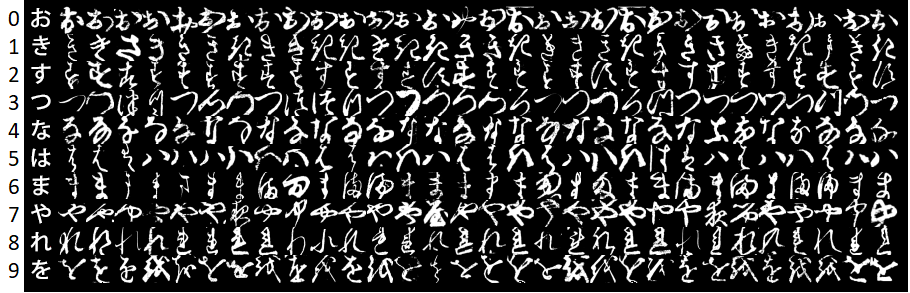

Kuzushiji is basically a cursive way to write Japanese characters, and more common characters actually have more variations than less common characters, which makes them harder to distinguish.  Translations made by experts have been established to take the handwritten characters and map them to modern, standardized versions.  For more, you can read about it here: https://www.tofugu.com/japanese/hentaigana-history-of-japanese-writing-system/

Wouldn't it be nice it this could be automated?  Let's start by loading some libraries...

Please note that this notebook must be run in a "Containerized" Jupyter Notebook on Rosie.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load and Visualize Data

The data are organized into four files:

* Training images
* Training labels
* Testing images
* Testing labels

These can be loaded with `np.load()`.  This will return a dict-like object with a single key: `arr_0`.  The objects need to be closed when done.

Images are stored as a 3D array: image, rows, columns.

In [2]:
with np.load("/data/cs2300/L8/kmnist-train-imgs.npz") as training_images_fl:
    print(list(training_images_fl.keys()))
    print(training_images_fl["arr_0"].shape)
    training_images = training_images_fl["arr_0"]
    
with np.load("/data/cs2300/L8/kmnist-test-imgs.npz") as testing_images_fl:
    print(list(testing_images_fl.keys()))
    print(testing_images_fl["arr_0"].shape)
    testing_images = testing_images_fl["arr_0"]
    
with np.load("/data/cs2300/L8/kmnist-train-labels.npz") as training_labels_fl:
    print(list(training_labels_fl.keys()))
    print(training_labels_fl["arr_0"].shape)
    training_labels = training_labels_fl["arr_0"]
    
with np.load("/data/cs2300/L8/kmnist-test-labels.npz") as testing_labels_fl:
    print(list(testing_labels_fl.keys()))
    print(testing_labels_fl["arr_0"].shape)
    testing_labels = testing_labels_fl["arr_0"]

['arr_0']
(60000, 28, 28)
['arr_0']
(10000, 28, 28)
['arr_0']
(60000,)
['arr_0']
(10000,)


Let's take a look at some of the characters.  

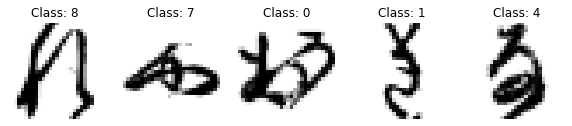

In [3]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
for ax, image, label in zip(axes, training_images, training_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Class: %i' % label)

## Set up Data for Deep Learning Models

In the following cell, we reshape and prepare the data for training.  The data needs to be in 4D tensors of shape (N,28,28,1) where N is the number of images.  Each image is 28x28 pixels.  Since they are greyscale, the images only have a single channel. 

The tensors represent the 256 possible gray colors using integer values (e.g., 0, 1, 2, …, 255).  You need to convert the tensors to floats by dividing by 255 to scale the pixels to the range of [0, 1].  You should add the lines of code to do this in the area marked TODO below.

In [4]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

x_train = training_images
x_test = testing_images
# Convert class vectors to binary class matrices
y_train = training_labels
y_test = testing_labels

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0




In the following cell, print out the number of training and test samples using x_train and x_test.  Store these values in variables named train_samples and test_samples (respectively).  

In [5]:
# TODO
len_x_train = len(x_train)
len_x_test = len(x_test)

print(f'length of x train: {len_x_train}')
print(f'length of x test: {len_x_test}')

length of x train: 60000
length of x test: 10000


## Create the first model

Next we will create a fully connected feed forward neural network (aka. Dense Neural Network (DNN)) model.  You need to add a line of code below to calculate the number of steps per epoch based on the number of training samples and batch size.  

In [6]:
dnn_epochs = 5
dnn_batch_size = 32

dnn_step_per_epoch = len_x_train / dnn_batch_size
print(dnn_step_per_epoch)

1875.0


In [7]:


# TODO Calculate steps_per_epoch



dnn_model = Sequential()
dnn_model.add(Flatten())
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(num_classes, activation='softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9,momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop")
dnn_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

# create the data generator to feed the training with augmentations
datagen = ImageDataGenerator(rotation_range=15,zoom_range=0.05)
datagen.fit(x_train)

## DNN Training

You should then run the next cell with the current hyperparameters, and then experiment with different epoch numbers, batch sizes, and data augmentation (rotation, zoom) to determine what configuration gives a "good" balance of accuracy and performance.  If you are feeling ambitious, you could experiment with the number of hidden dense layers and optimization functions (https://keras.io/api/optimizers/).  Record all your experiments in a markdown table in the DNN Results table below.  You should run at least 5 different experiments.  

Hints:
- You can determine the model size (total number of parameters) using the .summary() method for each model you create. 
- You can measure the test accuracy using the code below.

After running all your experiments for the DNN, you should create a plot that shows how they trade off performance (training time) vs. test accuracy.

Make a few statements on what you observed about the relationships between the data you captured in the table.  There should be notable correlations.    

In [8]:
steps_per_epoch = dnn_step_per_epoch
history = dnn_model.fit(datagen.flow(x_train,training_labels,shuffle=True),
                                  steps_per_epoch = steps_per_epoch,
                                  epochs=dnn_epochs)


Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4717 - accuracy: 0.8539
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2714 - accuracy: 0.9183
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2250 - accuracy: 0.9344
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2036 - accuracy: 0.9412
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1903 - accuracy: 0.9453


## Accuracy
In the next cell, we calculate the accuracy of the model against an unseen set of data "test".  Remember, this data was not used in training, so it is a measure of the real-world generalization capability of the model.    

In [9]:
predicted_probabilities = dnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
acc = 100. * accuracy_score(y_test, predicted_classes)
print("Accuracy: {:.2f}%".format(acc))

Accuracy: 88.23%


In [10]:
#TODO print model summary
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## DNN Results


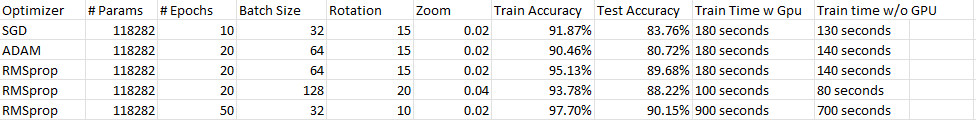

## Confusion Matrix
In the next cell we create a confusion matrix using the "test" data using the most recently fit model.  On the y-axis is the true label and on the x-axis is the predicted label from the model.  Larger counts on the diagonal indicates more correctly classified characters.  

In the markdown cell below, please identify which configuration of hyperparameters and data augmentation resulted in the best looking confusion matrix and whether it was the same as the configuration you identified earlier.  If they are different, hypothesize why.  

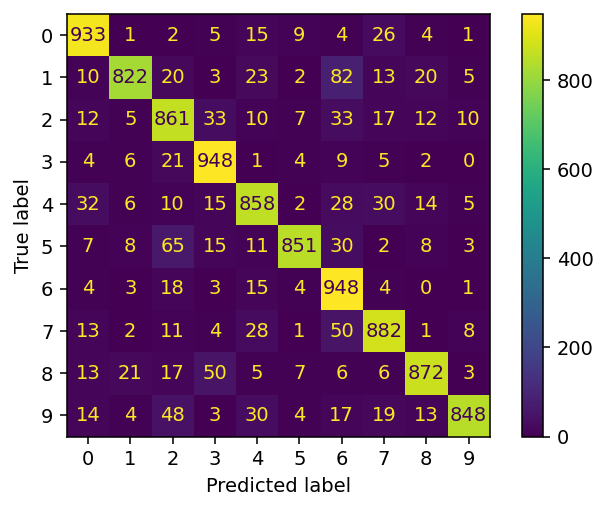

In [11]:
plt.rcParams["figure.dpi"] = 140
cm = confusion_matrix(y_test, predicted_classes)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
cmp.plot()
plt.show()

## Reflection on Confusion Matrix
TODO

# Create and Evaluate CNN
Next, we create an Convolutional Neural Network (CNN) Model.  Similar to the DNN model, you should calculate the steps_per_epoch below.  

As with the DNN model above, adjust the hyperparameters and data augmentation to try to achieve the best possible accuracy.  You can also try uncommenting the lines below to add some layers to the model to see if that has an effect on training time or accuracy.  Capture all your experiments in a table below.  

In [12]:
# TODO Calculate steps_per_epoch

cnn_epochs = 10
cnn_batch_size = 64

cnn_step_per_epoch = len_x_train / cnn_batch_size
print(cnn_step_per_epoch)
step_per_epoch = cnn_step_per_epoch





cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
#cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
#cnn_model.add(Dense(128, activation='relu'))
#cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9,momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop")

cnn_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])
history_cnn = cnn_model.fit(datagen.flow(x_train,training_labels,shuffle=True),
                                  epochs=cnn_epochs, steps_per_epoch=steps_per_epoch)


937.5
Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2745 - accuracy: 0.9164
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1090 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0806 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0704 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0634 - accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0584 - accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0592 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0549 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0539 - accuracy: 0.9851
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/s

In [13]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

Accuracy: 94.52%


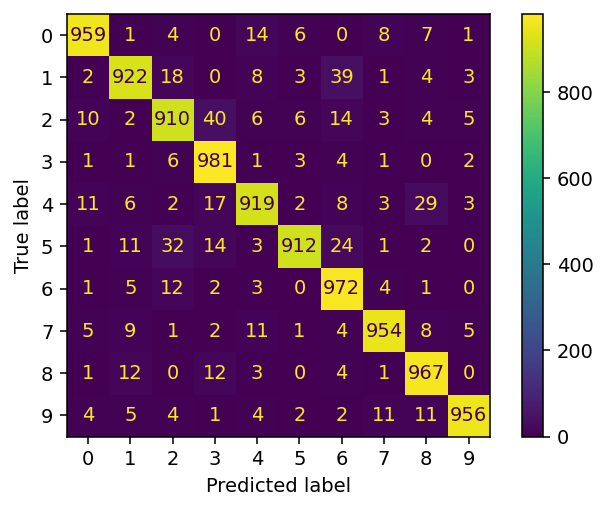

In [14]:
predicted_probabilities = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

acc = 100. * accuracy_score(y_test, predicted_classes)
cm = confusion_matrix(y_test, predicted_classes)

print("Accuracy: {:.2f}%".format(acc))
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
cmp.plot()
plt.show()

## CNN Results

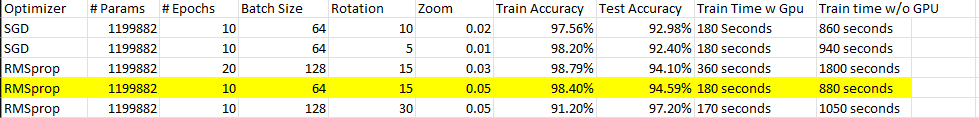

Identify the "best" confusion matrix for your CNN models 
The Best confusion Matrix (and model) is the one above ^. It is also highlighted in the image


In this cell, answer the following questions 

1. Which model (CNN or DNN) achieved the best test accuracy?
Hint: it is possible to achieve better than 95% accuracy on the test set!

CNN achieved better accuracies throughout comparison between the two. It achieved the highest accuracy overall as well.

2. Which model trained faster?  What is the performance difference between running the slower model on a CPU vs GPU? 

The DNN model trained a lot faster than the CNN model. The performance difference is huge when running a CNN model on GPU's vs. without. The GPU is at least 5 times faster.

3. Which model was larger (had the most parameters)?  How many parameters did each model have?  Is the number of parameters related to the time it takes to train the model? 

The DNN models all had 118282 parameters, whilst the CNN models had 1199882 parameters. The number of parameters seems to be slightly correlated to the time it takes to train. When this was run on GPU i got similar times for both models. However when running the same number of epochs in the two different models with no GPU, I saw a big increase in time when the number of parameters went up. This is most likely due to the fact that most of the time with the GPU is spent on overhead and not linear algebra. While all the time with no GPU is spent on calculations.

4. Based on your confusion matrices, which class was the most difficult to accurately predict?  Was it consistently difficult among different models?  How can you use the results from the confusion matrix to inform how you would test the mobile app for accuracy?

One digit that it had trouble correctly predicting was the number 1 (2nd: 5, 3rd: 4)
Among various models I found the beforementioned number hard to predict. 
When testing the model in the mobile app I will try out each digit, but especially hone in on the one that was consistently predicted wrong. I will try both the digit the model predicted to see if it will do the same thing it has done in the confusion matrix. And I will put in the digit that it was supposed to correctly identify and see if that one gets predicted correctly or if the error occurs a lot. 

5. What affect did data augmentation have on the CNN and DNN models? 

Data augmentation used on this data set was simply zoom and rotation. When I decreased the zoom and rotation the accuracy of the models went up. I think what is happening there is you zoom to much and some of the number gets cut out and is not seen in the model anymore.

6. What did you notice when you deployed the models on the Android device? Was the model able to recognize the charaters you tried to write?

The models worked pretty well. When using my best model it would predict the correct letter around 60% of the time. It seems as though I am not very good at drawing these characters. My drawings were to messy to get the accuracy scores that were occuring in the jupyter notebook.


## Converting the model to TFLite for exporting to Android/iOS

In [15]:
# TODO make sure you are exporting the right model here!
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

Float model size = 4689KBs.


Since this model will be on a mobile device, we want it to small and fast.  **Quantization** is an approach used to shrink ML models. In the following code, we use 8-bit numbers to approximate our 32-bit weights, which shrinks the model size by a factor of 4.

In [16]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

Quantized model size = 1176KBs,
which is about 25% of the float model size.


Next, we download the TFLite model to be used in the mobile device!

In [17]:
# Save the quantized model to file to the Downloads directory
f = open('kmnist.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

print('`kmnist.tflite` has been downloaded')

`kmnist.tflite` has been downloaded


This notebook was originally created by RJ Nowling and modified by Derek Riley and Gabe Wright